<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#Analyse-du-problème-à-une-seule-variable" data-toc-modified-id="Analyse-du-problème-à-une-seule-variable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse du problème à une seule variable</a></span></li><li><span><a href="#Forme-quadratique" data-toc-modified-id="Forme-quadratique-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Forme quadratique</a></span></li><li><span><a href="#Problème-à-n-variables" data-toc-modified-id="Problème-à-n-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problème à n variables</a></span></li><li><span><a href="#Méthodes-de-descente-de-gradient" data-toc-modified-id="Méthodes-de-descente-de-gradient-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Méthodes de descente de gradient</a></span><ul class="toc-item"><li><span><a href="#Descente-de-gradient-à-pas-fixe" data-toc-modified-id="Descente-de-gradient-à-pas-fixe-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Descente de gradient à pas fixe</a></span></li><li><span><a href="#Cas-test" data-toc-modified-id="Cas-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cas test</a></span></li></ul></li><li><span><a href="#Méthode-de-la-descent" data-toc-modified-id="Méthode-de-la-descent-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Méthode de la descent</a></span></li><li><span><a href="#Gradient-conjgué" data-toc-modified-id="Gradient-conjgué-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gradient conjgué</a></span></li></ul></div>

In [1]:
from __future__ import division
import numpy as np
from plot import *

## Notation

Soit $A \in \mathbb{R}^{n\times n}$ une matrice carrée, and $x\in\mathbb{R}^n$ and $b\in\mathbb{R}^n$ des vecteurs. On souhaite résoudre le système suivant

\begin{align*}   
A x &=b\\
\begin{bmatrix}
    A_{11} & A_{12} & \dots & A_{1n} \\
    A_{21} & A_{22} &        & A_{2n} \\
    \vdots &        & \ddots & \vdots \\
    A_{n1} & A_{n2} & \dots & A_{nn} \\
  \end{bmatrix}
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n\\
    \end{bmatrix}
    &=
\begin{bmatrix}
    b_1\\
    b_2\\
    \vdots\\
    b_n\\
    \end{bmatrix}
\end{align*}

Le *produit interne*, i.e. le produit scalaire, entre deux vecteurs s'écrit $x^Ty$. Il représente la somme $\sum_{i=1}^{n} x_iy_i$. Par construction, $x^Ty = y^Tx$. Si $x$ et $y$ sont orthogonales, alors $x^Ty = 0$. En général, les expressions qui se réduisent à des matrices $1 \times 1$, telles que  $x^Ty$ and $x^TAx$, sont traitées comme des scalaires.

Une matrice est dite *définie positive* si, pour tout vecteur non nul $x$,
\begin{equation}
x^TAx > 0 
\end{equation}

Pour complétude, rappelons les égalités  $(AB)^T = B^TA^T$ and $(AB)^{-1} = B^{-1}A^{-1}$.

In [2]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

## Analyse du problème à une seule variable


Considérons le problème de minimisation d'une fonction réelle $h(\theta)$. Supposons sans perte de généralité que nous étudions un minimum local de $h$ situé en $\theta=0$. Exprimons $h$ en série de Taylor autour de $\theta = 0$ :
\begin{align*}
h(\theta) = h(0) + h'(0)+\dfrac{h^{(2)}(0)\theta^2}{2!}+\dfrac{h^{(3)}(0)\theta^3}{3!}+\cdots+\dfrac{h^{(n)}(0)\theta^n}{n!}+\cdots
\end{align*}

Supposons maintenant que les $j-1$ premières dérivées de $h$ au point $0$ sont toutes nulles, et
que la première non-nulle est $h^{(j)}(0)$. Alors, en utilisant le théorème de Taylor, on a
\begin{align*}
h(\theta)=h(0) + \dfrac{h^{(j)}(0)\theta^j}{j!}+R_{j+1}(\theta),
\end{align*}
où $R_{j+1}(\theta)$ est le reste d'ordre $j+1$. Donc que $0$ est un minimum local si $\dfrac{h^{(j)}(0)\theta^j}{j!}+R_{j+1}(\theta)$ est positif pour des valeurs suffisamment petites de $|\theta|$.

> Théorème
> 
> Une condition nécessaire et suffisante pour qu’une fonction analytique
$h : \mathbb{R} \to \mathbb{R}$ possède un minimum local en $\theta$ est que la première dérivée non nulle de $h$ en $\theta$ soit d’ordre pair, et de valeur positive.
\end{theorem}

## Forme quadratique

Une forme quadratique est un nombre réel, une fonction quadratique d'un vecteur de la forme

\begin{equation}
f(x) = \frac{1}{2} x^T A x - b^T x + c \tag{3}
\end{equation}

avec $A$ une matrice, $x$ et $b$ des vecteurs, et $c$ un nombre réel constant. 

Dans la suite, nous allons nous intéresser au problème exemple
\begin{equation}
A = \begin{bmatrix} 3 & 2 \\ 2 & 6 \end{bmatrix},\quad b = \begin{bmatrix} 2 \\ -8 \end{bmatrix},\quad c=0 \tag{4}
\end{equation}

Le système $Ax = b$ est illustré sur la Figure 1. En général, la solution $x$ se trouve au point d'intersection des hyperplans, chacun ayant une dimension $n-1$. Pour le problème exemple, la solution est $x = [2, -2]^T$. La forme quadratique correspondante est illustrée dans la Figure 2. Le plot des contours est affiché dans la Figure 3.

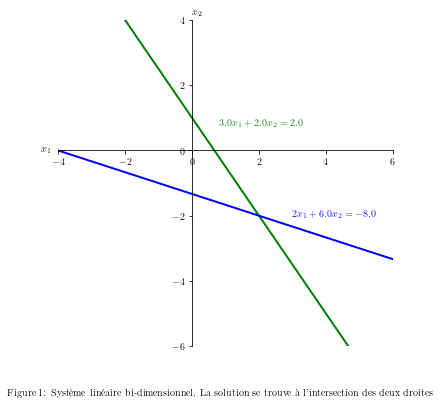

In [3]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

plot_figure1(A,b)

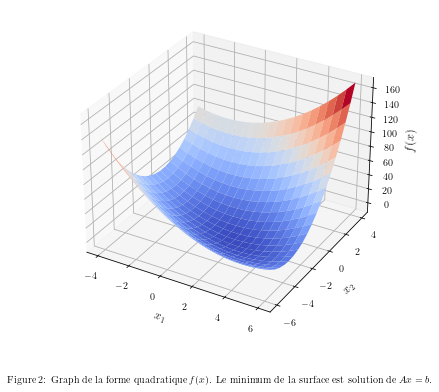

In [4]:
plot_figure2(A,b,c)

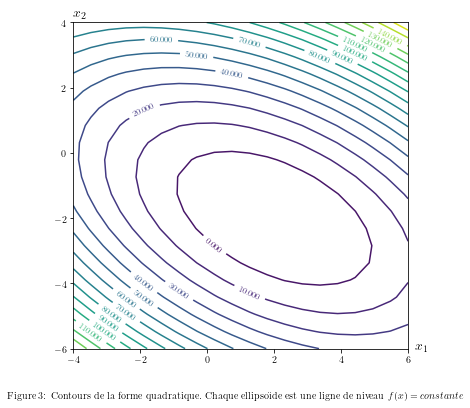

In [5]:
plot_figure3(A,b,c)

$A$ est définie positive, alors ls surface est de f(x) à la forme d'un paraboloïde. Le gradient d'une forme quadratique en dimension $n$ s'écrit

\begin{equation}
f'(x) = 
\begin{bmatrix}
\frac{\partial}{\partial x_1}f(x)\\
\frac{\partial}{\partial x_2}f(x)\\
\vdots\\
\frac{\partial}{\partial x_n}f(x)
\end{bmatrix}. \tag{5}
\end{equation}

Un gradient est un champ de vecteur qui, à un point $x$, se dirige dans la direction de plus grande croissance de $f(x)$. La Figure 4 illustre le champ de gradient pour le problème initial. En bas de la parabole, le gradient est nul.
On trouve le minimum de $f(x)$ en résolvant $f'(x)=0$.

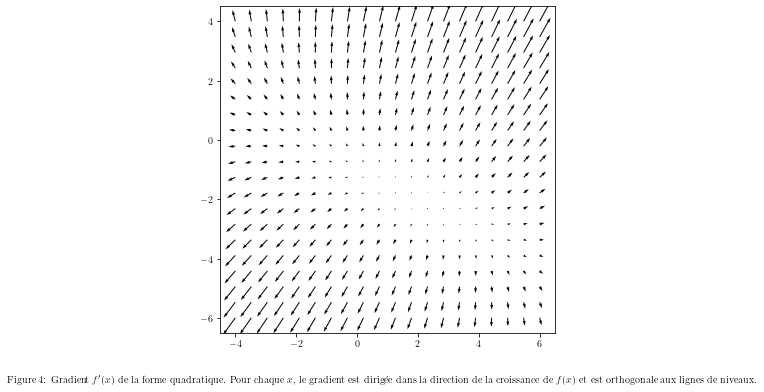

In [6]:
fig = plt.figure(figsize=(6,6), num='Figure 4')
size = 20
x1 = np.linspace(-4, 6, size)
x2 = np.linspace(-6, 4, size)
x1, x2 = np.meshgrid(x1, x2)
plt.quiver(x1, x2, A[0,0]*x1 + A[0,1]*x2 - b[0,0] + c, A[1,0]*x1 + A[1,1]*x2 - b[1,0] + c)
txt = "Figure 4: Gradient  $f'(x)$ de la forme quadratique. Pour chaque $x$,  le gradient est dirigée dans la direction de la croissance de $f(x)$ et est orthogonale aux lignes de niveaux."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center')
plt.show()

Si on applique le calcul du gradient à la forme quadratique, on obtient

\begin{equation}
f'(x) = \frac{1}{2}A^Tx + \frac{1}{2}Ax - b.
\end{equation}

Si $A$ est symmetrique, cette équation devient

\begin{equation}
f'(x) = Ax - b. 
\end{equation}

Dire que le gradient est nul revient à écrire la première équation, le système linéaire que nous devons résoudre. Par conséquent, la solution de $Ax = b$  est un point critique de $f(x)$. Si $A$ est définie positive et symmétrique, la solution est le minimum de $f(x)$, donc $Ax = b$	peut être résolu en trouvant $x$  qui minimise $f(x)$. (si $A$ n'est pas symétrique, alors nous devrons résoudre le système $\frac{1}{2}(A^T + A)x = b$, $\frac{1}{2}(A^T + A)$ est  symétrique.

Soit $p$ un point quelconque et $x = A^{-1}b$. D'après l'équation d'une fonction quadratique, on peut montrer que  one si $A$ est symétrique,

\begin{equation}
f(p) = f(x) + \frac{1}{2}(p-x)^TA(p-x).
\end{equation}

Si $A$ est définie positive, alors en utilisant l'inégalité du départ, la seconde partie de l'équation est positive pour tout $p \neq x$. On en déduit donc que $x$ est le minimum global de $f$.

**Remarque**
La forme paraboloïde repose sur le fait que $A$ est une matrice définie positive. Si ce n'est pas le cas, alors nous sommes dans l'une des situations possibles :
- Si $A$ est définie négative, il suffit de considérer $-A$ et les résultats seront identiques.
- Si $A$ est singulière, alors la solution n'est pas unique. Il existe un ensemble de solutions, une ligne dans l'hyperplan qui donne une valeur uniforme de $f(x)$.
- Dans tous les autres cas, il existe alors un point selle. Des techniques différentes devront être utilisées.

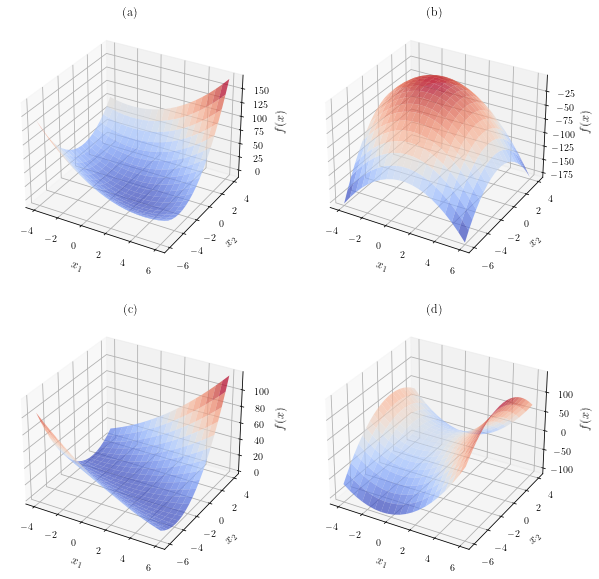

In [7]:
fig = plt.figure(figsize=(10,10), num='Figure 5')
fig.add_subplot(2, 2, 1, projection='3d')
A = np.matrix([[3., 2.], [2., 6.]]); b = np.matrix([[2.], [-8.]])
plotAbc3D(A, b, 0., fig, alpha=0.7)
plt.title('(a)')
fig.add_subplot(2, 2, 2, projection='3d')
A = np.matrix([[-6., -1.], [-1., -6.]]); b = np.matrix([[0.], [0.]])
plotAbc3D(A, b, 0., fig, alpha=0.7)
plt.title('(b)')
fig.add_subplot(2, 2, 3, projection='3d')
A = np.matrix([[1., 2.], [2., 4.]]); b = np.matrix([[-1.5], [-3.]])
plotAbc3D(A, b, 0., fig, alpha=0.7)
plt.title('(c)')
fig.add_subplot(2, 2, 4, projection='3d')
A = np.matrix([[8., -1.], [-1., -6.]]); b = np.matrix([[0.], [0.]])
plotAbc3D(A, b, 0., fig, alpha=0.7)
plt.title('(d)');

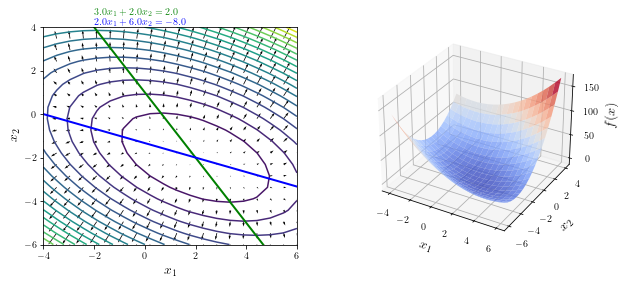

In [8]:
hdls = fig_A()

## Problème à n variables

> __Exercice__
> 
> 1. Soit $c=(c_1,\cdots, c_n)$ et la fonction linéaire 
> $f(x) =cx = (c_1,\cdots, c_n)
> \left(\begin{array}{c}
x \\
x_1 \\ 
\vdots \\
x_n\end{array}\right) = \sum_{i=1}^n c_i x_i$.
Vérifier que $\nabla f(x) = c$.
>
> 2. Soient $c=(c_1,\cdots, c_n)$ et $A\in \mathbb{R^{n\times n}}$, une matrice symétrique.
> Pour $f(x) = \dfrac{1}{2} x^T A x + cx$, vérifier que $\nabla f(x)=x^T A +c$.

> __Définition__
> 
> Soit le problème de minimisation $\min_{x\in\mathbb{R}} f(x)$. 
> 
> En dimension 1, un point $\bar x$ qui annule la dérivée de $f$, $f'(\bar x)$ est nommé point stationnaire pour le problème de minimisation.
> 
> En dimension $n$, un point $\bar x\in\mathbb{R}^n$ qui annule $\nabla f(x)$ est nommé point stationnaire.

Il existe plusieurs types de points stationnaires

1. Les points stationnaires qui satisfont à la condition suffisante d’optimalité de second ordre ($f''(\bar x)>0 $) sont des minima.
Par ailleurs, si $\bar x$ est un minimum local de la fonction $f$, alors nécessairement on a $f'(\bar x)=0$ et $f''(\bar x)\geq 0$.

2. Les points stationnaires qui satisfont à la condition suffisante d’optimalité de second ordre ($f''(\bar x)<0 $) sont des maxima.
Par ailleurs, si $\bar x$ est un maximum local de la fonction $f$, alors nécessairement on a $f'(\bar x)=0$ et $f''(\bar x)\leq 0$.

3. Si $\bar x$ ne correspond pas à l'un de ces situations, alors le point stationnaire est un point d'inflexion.

> __Exercice__
>
> Montrez que la fonction
\begin{align*}
f(x) = (2-x^2)^2 +x^5
\end{align*}
possède deux points stationnaires, un maximum et un minimum local.

> __Exercice__
> 
> Déterminer les points stationnaires de 
>
>1. $f(x,y) = -x^2 - y^2$
>1. $f(x,y) = -x^2 - y^2$
>1. $f(x,y) = x^2 + y^2$
>1. $f(x,y) = x^2 - y^2$

## Méthodes de descente de gradient

Le principe de base des méthodes de descente est très simple : on fait comme sur une carte topographique, et on utilise les lignes de niveau pour se diriger vers le fond d’une vallée.

> __Définition__ [Direction de descente]
> 
> Soit $f$ une fonction $C^1$ de $\Omega$ dans $\mathbb{R}$. On dit que $d \in\mathbb{R}^n$ est une direction de descente en $x$ si la fonction auxiliaire d’une variable $h : t \mapsto f (x + td)$ vérifie $h'(0) < 0$.

Si $d$ est une direction de descente, alors $h$ est strictement décroissante au voisinage de $0$ : pour
tout $\alpha>0$ suffisamment petit, on a $f (x + \alpha d) < f (x)$. Attention, ce n’est pas équivalent, il se
pourrait bien que ce soit le cas avec $h'(0) = 0$. La notion de direction de descente est une notion un peu plus forte.

> __Définition__ [Algorithme général pour les méthodes de descente]
> 
> On se fixe un point initial $x_0\in\Omega$. À chaque itération, notée $k$, on réalise les étapes suivantes :

> - on choisit une direction de descente $d_k$;
> - on choisit un pas $\alpha_k$ tel que $x_k + \alpha_k d_k \in\Omega$ et que $f(x_k + \alpha_k d_k ) < f (x_k )$,
> - on pose $x_{k+1} = x_k + \alpha_k d_k$.

> Les différentes méthodes de descente correspondent à des choix différents pour les directions de descente et les pas. On commence par la méthode la plus simple, où le pas est constant, et où la direction est celle de plus grande pente.

### Descente de gradient à pas fixe

> __Proposition__ Interprétation géométrique du gradient]
> 
> On munit $\mathbb{R}^n$ de sa norme euclidienne notée $k\cdot k$. Soit $f$ une fonction $C_1$ de $\Omega$ dans $\mathbb{R}$. On a les résultats suivants :
>
>- L’opposé du gradient, $-\nabla f(x)$, est une direction de descente en $x$ si $\nabla f (x) \neq 0$.
>- La direction du gradient est la direction de plus forte pente (si $\|d_k\| = 1$, alors la pente dans la direction d correspond à la dérivée de $h$ en $0$).
>- Le gradient est perpendiculaire aux lignes de niveau.

> __Démonstration__
>
> Si $h(t) = f (x + td)$, par composition on a $\langle h'(t) = h\nabla f (x + t d), d\rangle$, donc en $0$ on
> obtient $h'(0) = \langle h\nabla f (x), d\rangle$. Donc si $d = −\nabla f (x)$ on obtient $h'(0) = −\|\nabla f (x)\|_2 < 0$ si $\nabla f (x) \neq 0$.
>
> Si $\| d \| = 1$, par Cauchy-Schwarz, on obtient que $h'(0) = \rangle \nabla f(x), d\langle \leq \| \nabla f(x)\| \|d\|$, avec égalité si et seulement si $\nabla f$ et $d$ sont positivement liés, autrement dit si $d = \dfrac{\nabla f (x)}{ \|\nabla f (x)\|}$
>et que
> donc $h'(0)$ est maximal lorsque $d$ est aligné avec $\nabla f(x)$ (et minimal si $d$ est aligné avec $−\nabla f (x)$,
> par abus on parle aussi de plus forte pente lorsqu’elle est négative, avec une valeur absolue maximale.
>
> Enfin si $t \mapsto \gamma(t) \in \Omega$ (pour $t$ dans un intervalle $I$ fixé) est une ligne de niveau et si $x = \gamma(t_0)$ est un point de cette ligne de niveau, alors on a $f (\gamma(t)) = f (x)$ pour tout $t \in I$. En dérivant par rapport à $t$ on obtient $\langle \nabla f (x), \gamma_0(t_0)\rangle = 0$. Le vecteur $\gamma'(t0)$ étant un vecteur directeur de la tangente de la courbe $\gamma$ en $\gamma(t_0)$, donc $\nabla f(x)$ qui est orthogonal à la tangente à la courbe en $x$.
>
> C’est cela qu’on appelle être « perpendiculaire » aux lignes de niveau.

> Définition : [Algorithme de descente de gradient à pas fixe]
>
> On se fixe un pas $\alpha > 0$ et un point de départ $x_0\in\mathbb{R}^n$. On pose alors
> 
> \begin{align*}
> x_{k+1} = x_k − \alpha f (x_k).
> \end{align*}
> 
> On a pris ici $\mathbb{R}^n$ à la place de $\Omega$ pour s’éviter le cas où $x_{k+1}$ n’appartiendrait pas à $\Omega$. On se > donne en général un critère d’arrêt pour une tolérance $\varepsilon$ fixée, par exemple $\|\nabla f (x_k )\| \leq \varepsilon$ (le gradient est suffisamment proche de $0$) ou $|f (x_{k+1}) − f (x_k )| \leq \varepsilon$ (la valeur de $f$ ne diminue plus trop).

### Cas test

On regarde ce que donne la méthode dans le cas typique d’une fonction quadratique 
\begin{align*}
f (x) = \dfrac{1}{2}
\langle x, Ax \rangle + \langle b, x\rangle
\end{align*}
avec $A \in M_n(\mathbb{R})$ une matrice symétrique définie positive.

Le gradient en $x$ est donné par $Ax+b$, donc on cherche à approcher la solution de l’équation $Ax+ b = 0$.
La méthode de descente de gradient à pas fixe est donc donnée par
\begin{align*}
x_{k+1} = x_k − \alpha(Ax + b).
\end{align*}
Avant d’étudier la convergence, on a besoin d’un petit lemme classique concernant les matrices symétriques.

> Lemme
> 
> Soit $M$ une matrice symétrique de taille $n$. Alors, si $\lambda_1, \ldots,\lambda_n$ sont les valeurs propres de $M$, on a, pour tout $x\in\mathbb{R}^n$, $\|Mx \| = \max_{1\leq i\leq n} |\lambda_i
| \|x\|$.

> Démonstration 
> 
> On choisit $e_1, \ldots , e_n$ une base orthonormée de vecteurs propres de $M$, et si on décompose $x$ dans cette base :
> 
> \begin{align*}
>     x = \sum_{i=1}^n  x_ie_i,
> \end{align*}
> alors on a $\|x\|^2 = \langle x, x\rangle =\sum_{i=1}^n  x_i^2$.
>
> On a donc aussi $\|Mx\|^2 = \langle Mx, Mx \rangle =\sum_{i=1}^n  \lambda_i^2 x_i^2 \leq \max_{1\leq i \leq n} \lambda_i^2 \|x\|$.
> On obtient exactement le résultat voulu en prenant la racine carrée.

> __Proposition__
> 
> On pose $l$ (resp. $L$) la plus petite (resp. grande) valeur propre de $A$.
> Si $\alpha \in \left] 0,\dfrac{2}{L}\right[$, alors la convergence est linéaire avec un taux plus petit que $\max(|1−\alpha|, |1−\alpha L|)$.
>
> Le meilleur choix du pas pour rendre ce taux le plus petit possible est $\alpha =
> \dfrac{2}{l+L}$, et le taux est alors $\dfrac{L − l}{L+1}$.

> __Démonstration__
> 
> On utilise le critère de convergence linéaire, en écrivant que
>
> \begin{align*}
> x_{k+1} − x_k = x_k − \alpha(Ax_k + b) − x_{k−1} − \alpha(Ax_{k−1} + b) = (I_n − \alpha A)(x_k − x_{k−1}).
> \end{align*}
>
> Les valeurs propres de $I_n − \alpha A$ sont $1 − \alpha \lambda$ pour $\lambda$ valeur propre de $A$, et donc on obtient
>\begin{align*}
> \|x_{k+1} − x_k \| \leq \max(|1 − \alpha l|, |1 − \alpha L|)\|x_k − x_{k−1}\|.
>\end{align*}
>
> On a donc convergence linéaire avec le taux indiqué, dès que ce taux est strictement inférieur à $1$, ce qui correspond à $\alpha \in ]0,\dfrac{l}{2}[$ et $\alpha \in ]0,\dfrac{2}{L}[.$
>
> On obtient le minimum du taux lorsque les deux valeurs $|1 − \alpha l|$ et $|1 − \alpha L|$ sont égales (sinon on peut diminuer le max en modifiant légèrement $\alpha$). Dès que $L > l$ la seule possibilité pour que ces deux valeurs soient égales est que $1−\alpha l = −(1−\alpha L)$, ce qui donne bien le résultat attendu $\alpha = \dfrac{2}{l+L}$ , et le taux vaut alors
> \begin{align*}
> 1 − \dfrac{2 l}{l+L} = \dfrac{2L}{l+L} − 1 =
> \dfrac{L − l}{L+l}.
> \end{align*}
> On observe ici que le taux peut être très proche de $1$ lorsque $l \ll L$, on dit alors que la matrice
est mal conditionnée

## Méthode de la descent

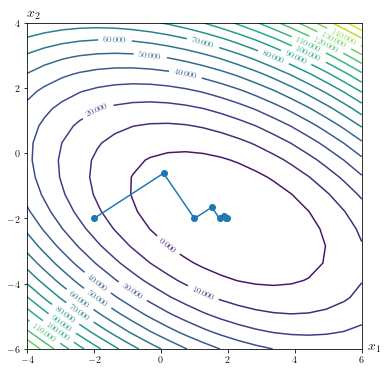

In [9]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0
fig8(A,b,c)

## Gradient conjgué

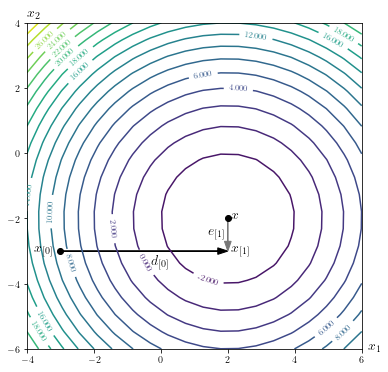

In [10]:
fig21()